In [22]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('spam_data.csv')

In [24]:
data.describe()

,Label,text
count,5196,5196
unique,2,5196
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4511,1


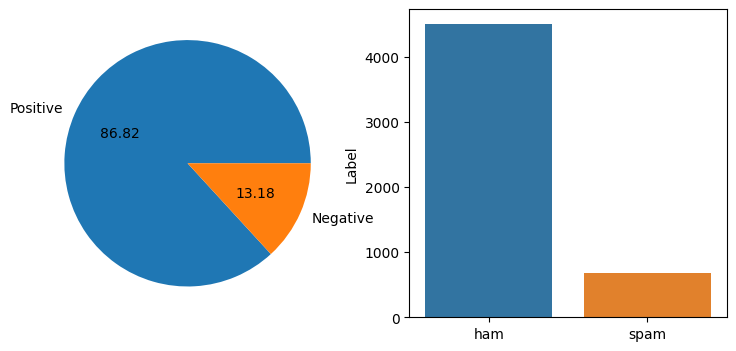

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(data['Label'].value_counts(),labels=['Positive','Negative'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=data['Label'].value_counts().index, y=data['Label'].value_counts(),data=data)
plt.show()

In [26]:
data['char_no']=data['text'].apply(len)
data['num_words']=data['text'].apply(lambda x: len(str(x).split()))
data['num_sen']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

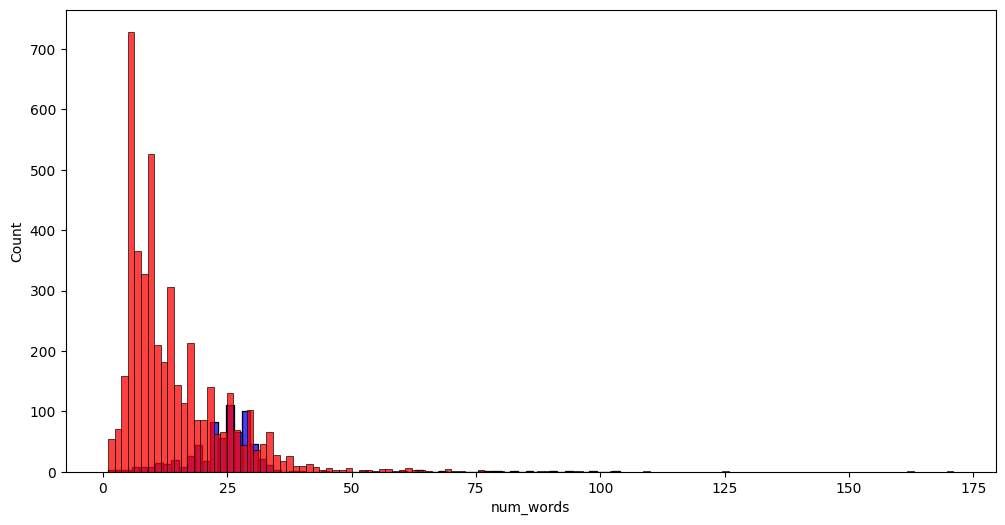

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Label']=='spam']['num_words'],color='blue')
sns.histplot(data[data['Label']=='ham']['num_words'],color='red')
plt.show()

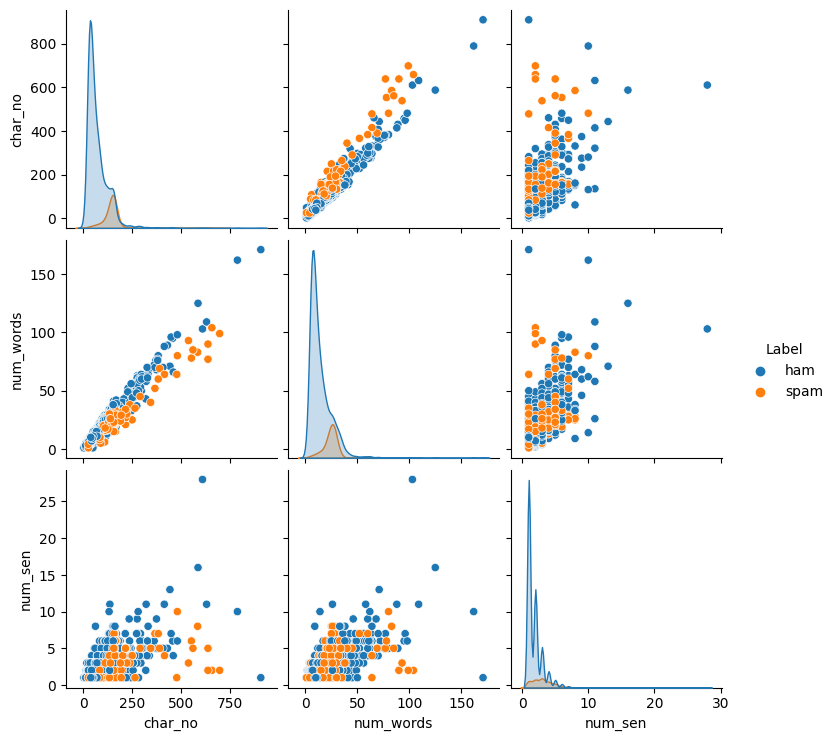

In [28]:
sns.pairplot(data,hue='Label')
plt.show()

In [29]:
#Handling outliers
i=data[data['char_no']>500].index
data.drop(i,axis=0,inplace=True)

data=data.reset_index()
data.drop("index",inplace=True,axis=1)

In [30]:
data.shape

(5183, 5)

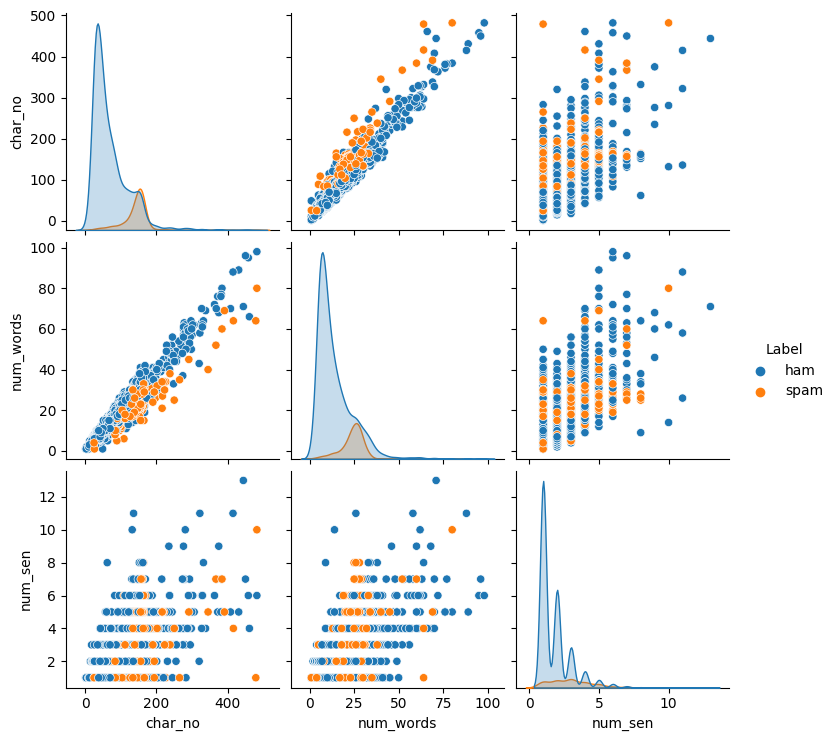

In [31]:
sns.pairplot(data,hue='Label')
plt.show()

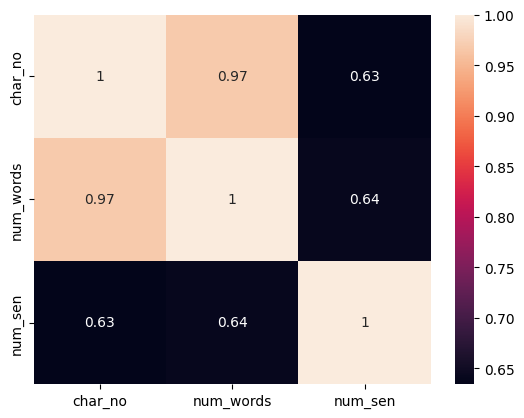

In [38]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [39]:
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string, time

In [40]:
string.punctuation, stopwords.words('english'), 

('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
 ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
 

In [43]:
#User Define Funtion for Text processing 
def remove_website_links(text):
    no_website_links = text.replace(r"http\S+", "")
    return no_website_links

def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')
    return removed_numbers

def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')
    return no_emails

#Call function
data['text'] = data['text'].apply(remove_website_links)
data['text'] = data['text'].apply(remove_numbers)
data['text'] = data['text'].apply(remove_emails)

In [45]:
#Create Common Function 
def transform_text(text):
    #1.lower casing
    text=text.lower()
    
    #2.tokenization
    lst=nltk.word_tokenize(text)
    
    #3.remove spcl characters stopwords and punctuation
    l1=[]
    useless_words=stopwords.words('english')+list(string.punctuation)
    for word in lst:
        if word.isalnum()==True and word not in useless_words:
            l1.append(word)
            
    #4.stemming        
    l2=[]
    for word in l1:
        ps=PorterStemmer()
        l2.append(ps.stem(word))
        
    return " ".join(l2).strip()
    l1.clear()
    l2.clear()   

#call function
data['text'] = data['text'].apply(transform_text)
data['num_words_transform']=data['text'].apply(lambda x: len(str(x).split()))

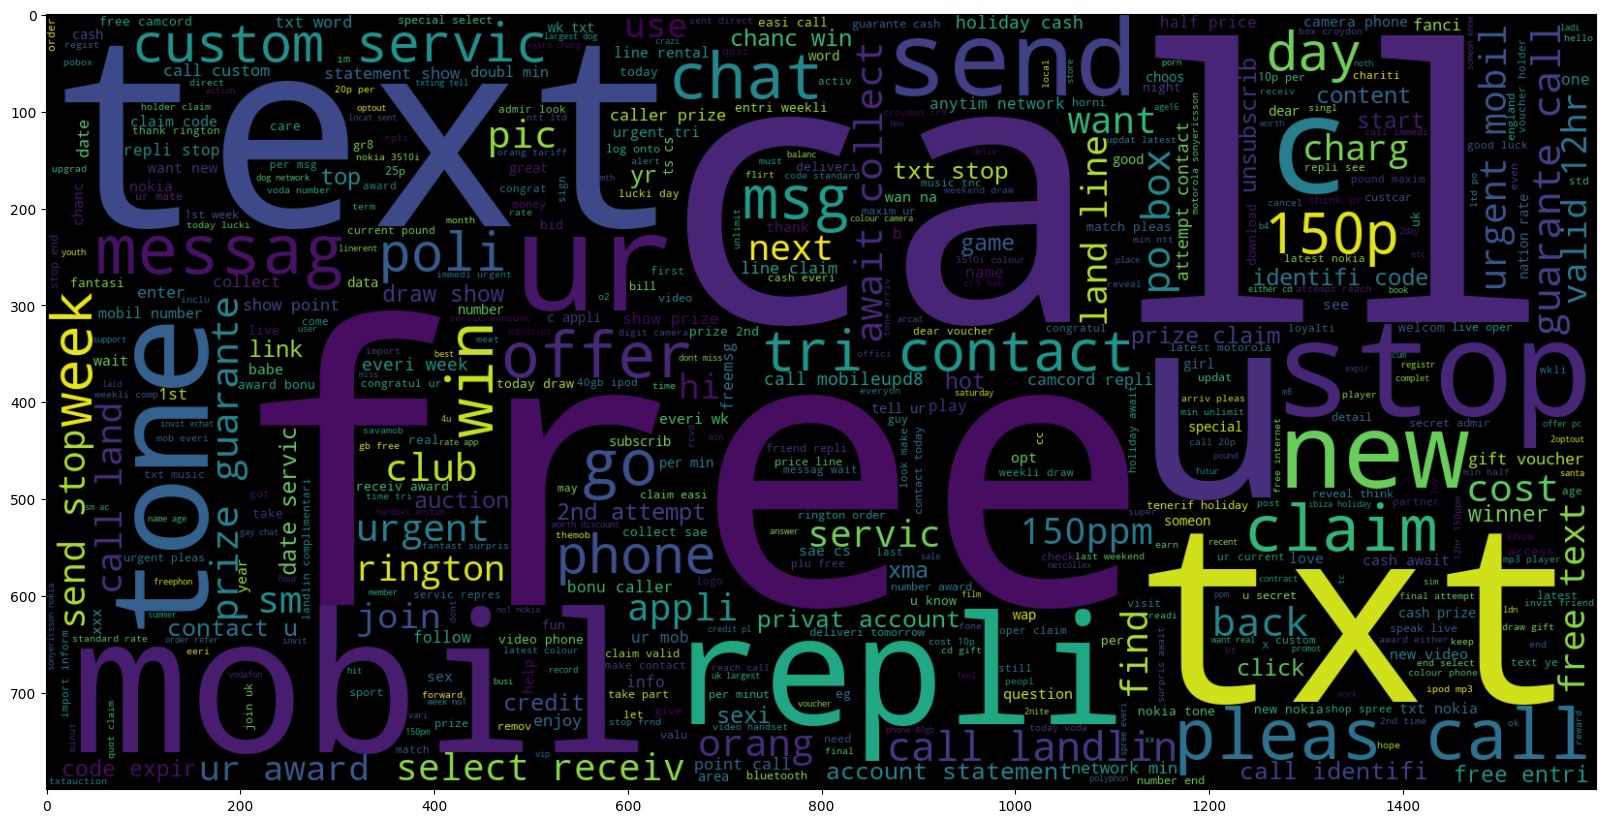

In [46]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(data[data.Label == 'spam'].text))
plt.imshow(wc , interpolation = 'bilinear')

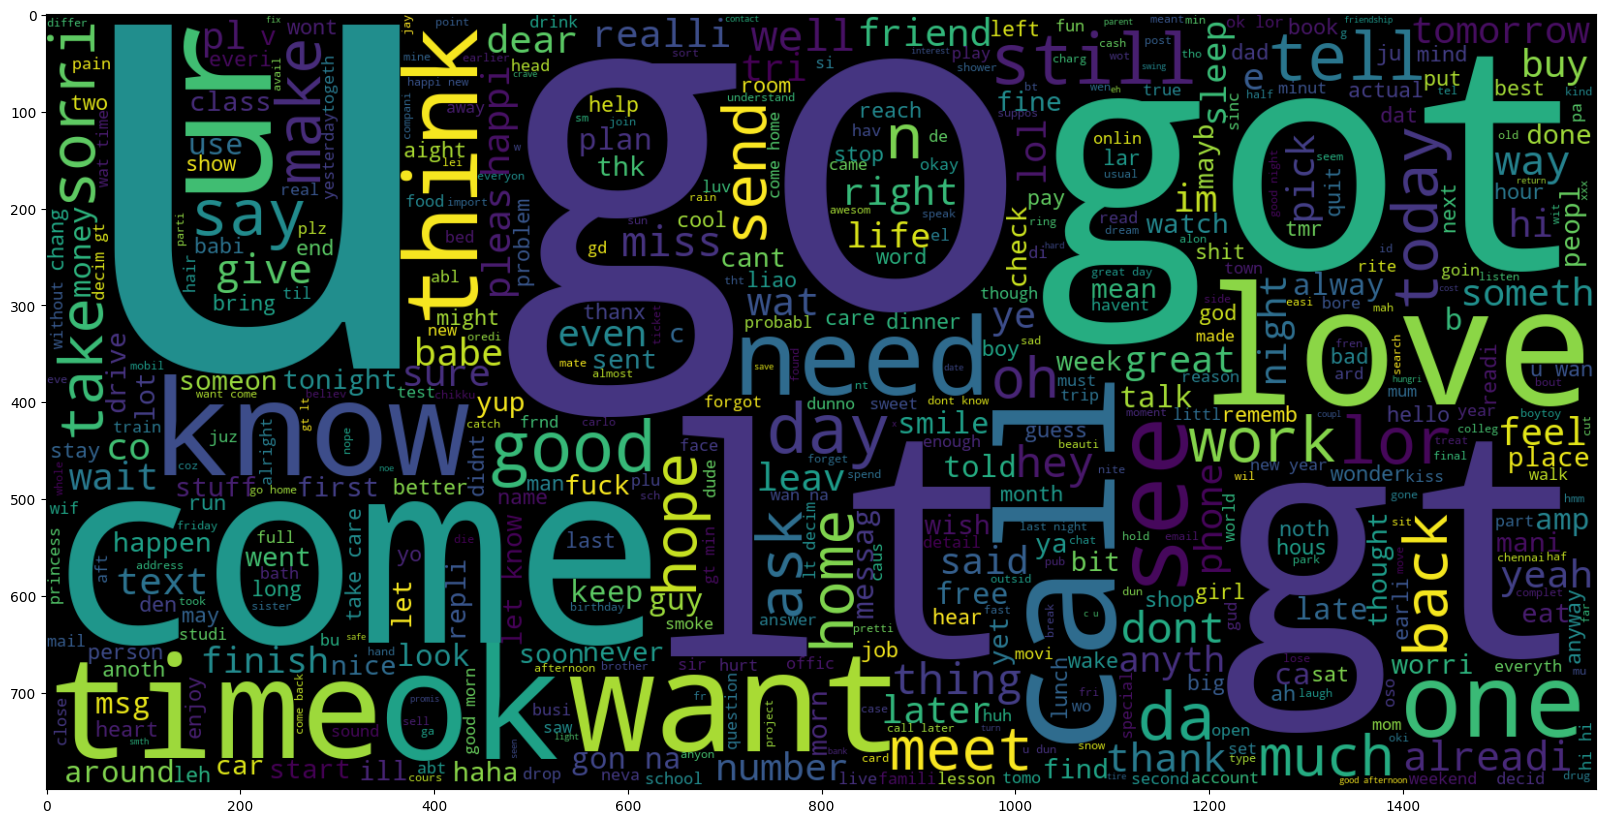

In [47]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(data[data.Label == 'ham'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [48]:
data['Label']=data['Label'].replace({'spam':0,'ham':1})
data.head()

,Label,text,char_no,num_words,num_sen,num_words_transform
0,1,go jurong point crazi avail bugi n great world...,111,20,2,16
1,1,ok lar joke wif u oni,29,6,2,6
2,0,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,24
3,1,u dun say earli hor u c alreadi say,49,11,1,9
4,1,nah think goe usf live around though,61,13,1,7


In [50]:
#create spam corpus which will holds all Spam words
spam_corpus = []
for msg in data[data['Label'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

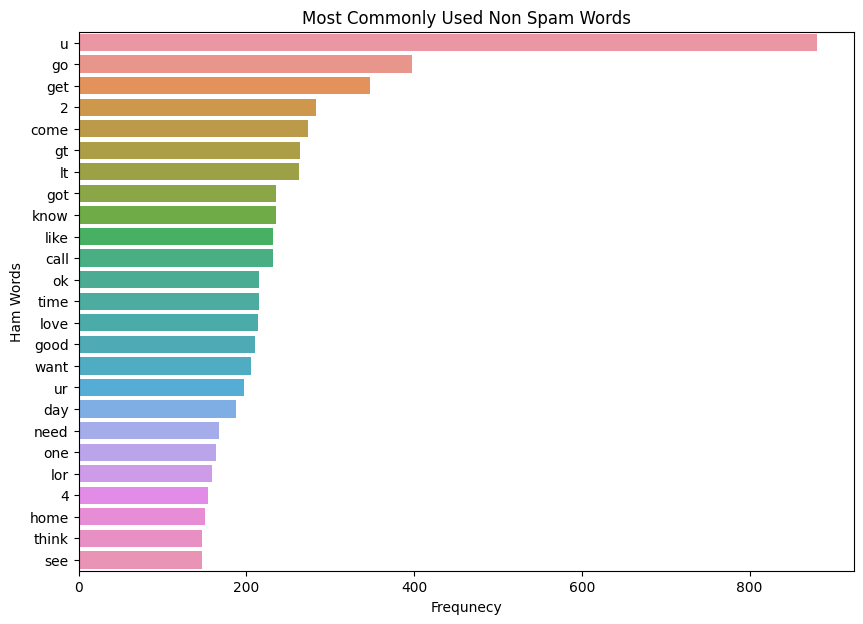

In [51]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Non Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

In [52]:
#create spam corpus which will holds all Ham or Non Spam words
ham_corpus = []
for msg in data[data['Label'] == 0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

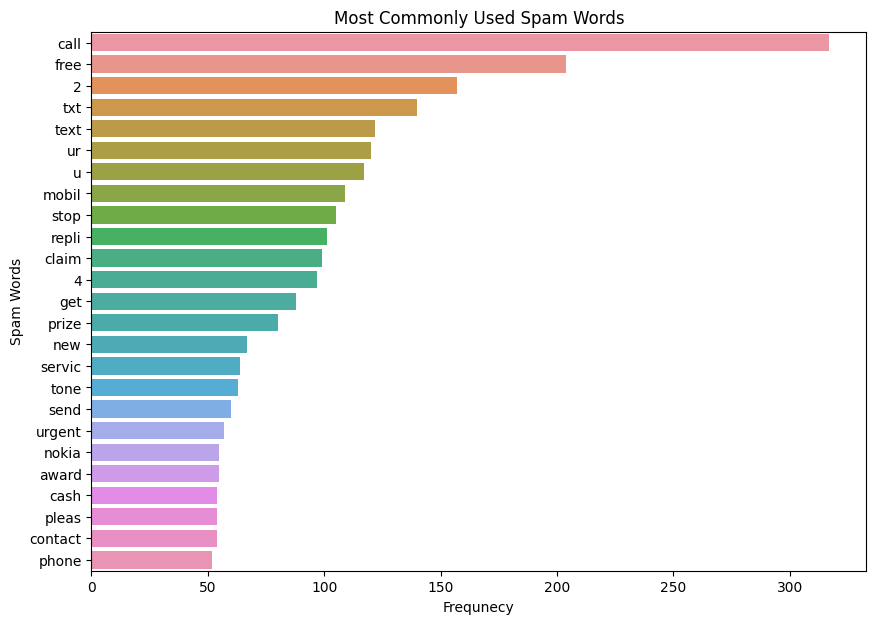

In [53]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

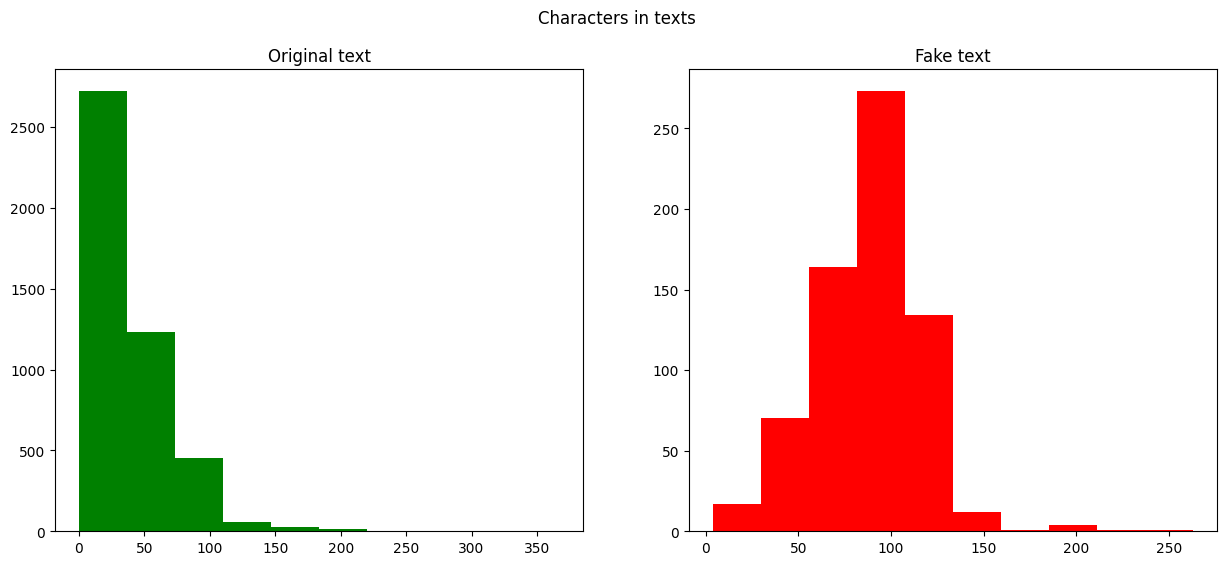

In [54]:
#Characters Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=data[data['Label']==1]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=data[data['Label']==0]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

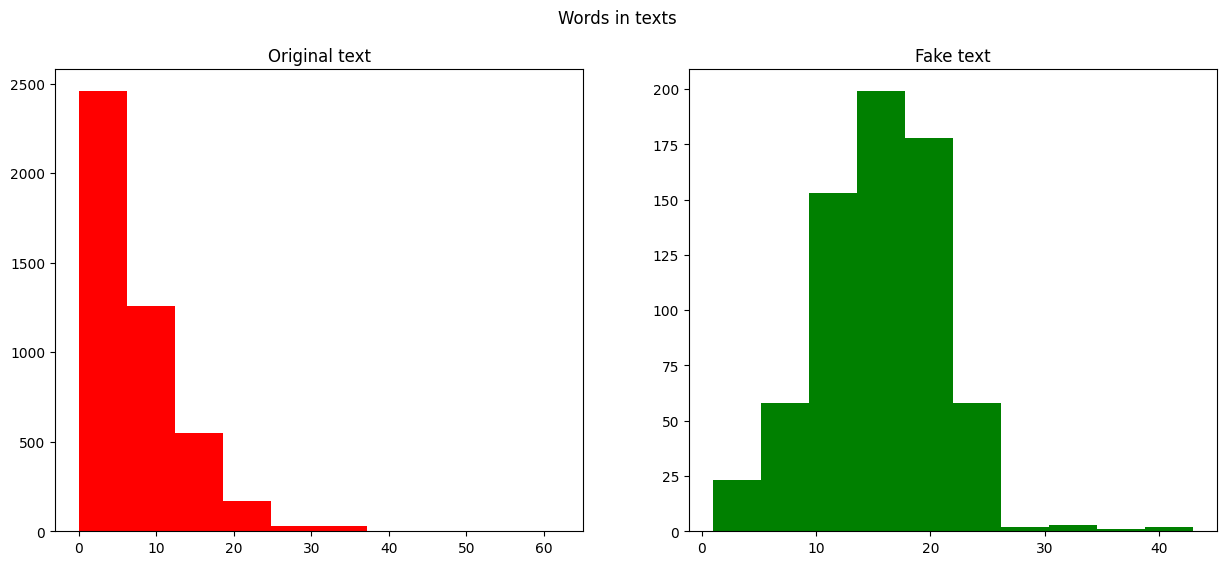

In [55]:
#Words Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=data[data['Label']==1]['num_words_transform']
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=data[data['Label']==0]['num_words_transform']
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

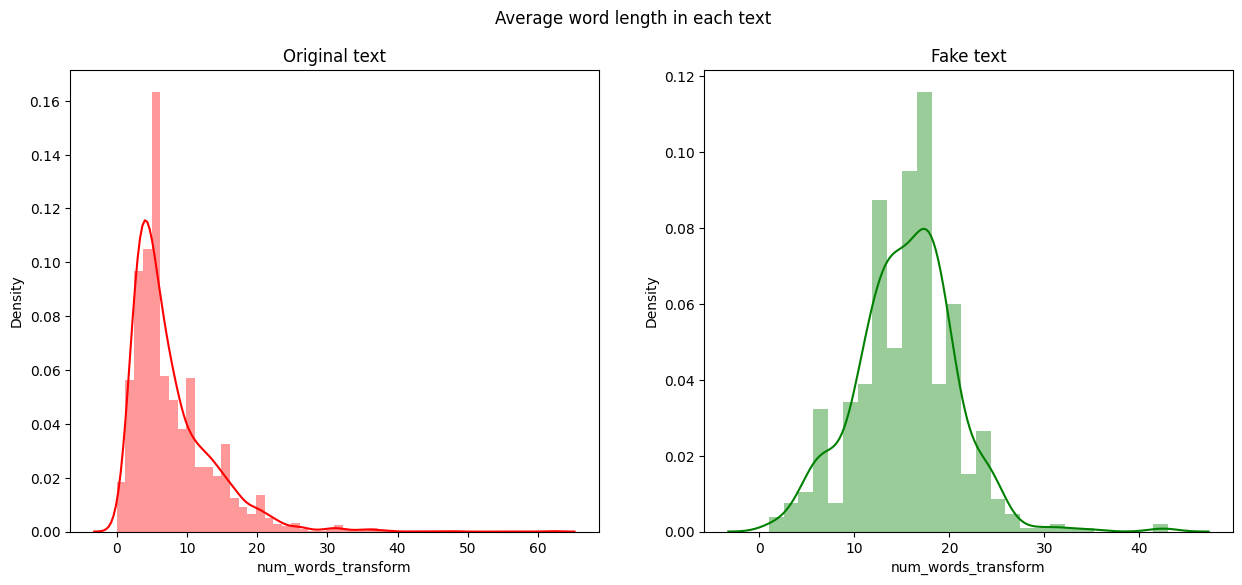

In [56]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
word=data[data['Label']==1]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=data[data['Label']==0]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [8]:
from sklearn.model_selection import train_test_split
X = data['text']
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [61]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, 
                        max_features=700, preprocessor=preprocessor, 
                        ngram_range=(1,1))

neural_net_pipeline = Pipeline([('vectorizer', tfidf), 
                                ('nn', MLPClassifier(hidden_layer_sizes=(700, 700)))])

neural_net_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, max_features=700,
                                 preprocessor=<function preprocessor at 0x000000D37A4CFA30>)),
                ('nn', MLPClassifier(hidden_layer_sizes=(700, 700)))])

In [62]:
# Testing the Pipeline

y_pred = neural_net_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: {} %'.format(100 * accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1362
        spam       0.97      0.88      0.92       197

    accuracy                           0.98      1559
   macro avg       0.97      0.94      0.95      1559
weighted avg       0.98      0.98      0.98      1559

Accuracy: 98.07568954457986 %


In [63]:
# Saving the Pipeline

from joblib import dump
dump(neural_net_pipeline, 'Scanscam.joblib')

['Scanscam.joblib']